# Personal Information
Name: **Karim Anwar**

StudentID: **2615855**

Email: [**karim.anwar@student.uva.nl**](karim.anwar@student.uva.nl)

Githuib: [**link**](https://github.com/Karim-Anwar/MasterThesis)

Submitted on: **21-03-2024**

# Data Context

The dataset under consideration consists of private videos capturing fish behavior  to extrnal threats, totaling 182 videos, each video has a similar one to which consists of the same enviornemnt and time filmed from a slightly diffrent angle. The external datasets come from the [*motchallenge.net*](motchallenge.net) (MOT17 and MOT20 most similar to our fish dataset) website that consist of videos of people in diffrent place for them to be tracked.<br>
The data consists of both videos and annotations of the tracked of objects (fish and people). Fish being the challenging part since it has multiple factors that can affect the trackign performance. Utilizing these established benchmarks, we aim to evaluate and compare the performance of our refined model against other publicly available models.

# Data Description

We observe the following analyses multiple things.
<ol>
<li>From the metadata of both the images and the annotations, we observe that our videos are mostly  of the same duration (< 2 sec) with a few exceptions (13 videos, over 13 seconds). Additionaly there are no class inbalances since the only labeled tracklets are of fish.</li>
<li> We observe after the distribution of the entites in the videos and we discover that the longer the duration of a video does not correspond to the number of entites in it. Most videos have ~20000 observed tracklets (bounding boxes on the total frames). Why in extreme cases ~105000 tracklets.</li>
<li> When we visualise the annotation to their corresponding frames we can observe that no annotations are missing and even if they are manually created and they do correspond to the according fish. Note: If the same fish exists in seperate videos, it does not necessarily have the same id. The fact that in the metadata there are 3999 annotated fish but we observed 3796 unique observations.
<li> Finally we do some observation of the motion using frame differencing to observe the mvoement of the entites between two frames.</li>
</ol>

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import cv2

### Data Loading

In [3]:
# Load your data here
meta = pd.read_xml(r'D:\Documents\Thesis Transformer\loom_video_annotations_sara.xml')

In [4]:
mp4_files = []
for root, dir, files in os.walk('vids'):
    for file in files:
        if file.endswith('.mp4'):
            mp4_files.append(file)


print(len(mp4_files))

182


### Analysis 1 (raw data): 
In this section we have a look at the raw data. For both the videos and the annotations.

In [5]:
def extract_video_duration(video_path):
    try:
        video = VideoFileClip(video_path)
        duration = video.duration
        return duration
    except Exception as e:
        print(f"Error extracting duration from {video_path}: {e}")
        return None
    
durations = {}  # Dictionary to store durations

for root, _, files in os.walk('vids'):
    for file in files:
        if file.endswith('.mp4'):
            video_path = os.path.join(root, file)
            filename = os.path.splitext(file)[0]  # Get filename without extension
            duration = extract_video_duration(video_path)
            
            if duration is not None:
                durations[filename] = duration
            else:
                print(f"Failed to extract duration from {video_path}.")

print("All durations:", durations)
    

All durations: {'10_1': 1.09, '10_2': 1.09, '116_2': 1.09, '122_2': 1.09, '129_2': 13.01, '134_1': 1.09, '134_2': 1.09, '13_1': 1.09, '143_1': 1.09, '14_2': 1.09, '15_2': 1.09, '161_2': 13.0, '168_1': 1.09, '168_2': 1.09, '16_1': 1.09, '175_1': 1.09, '175_2': 1.09, '183_1': 13.0, '183_2': 13.0, '186_2': 1.09, '187_1': 1.09, '189_2': 1.09, '194_1': 1.09, '194_2': 1.09, '195_1': 1.09, '195_2': 1.09, '198_1': 1.09, '198_2': 1.09, '202_2': 1.09, '204_2': 1.09, '206_1': 1.09, '20_1': 1.09, '20_2': 1.09, '212_1': 1.09, '212_2': 1.09, '214_1': 1.09, '214_2': 1.09, '217_1': 1.09, '223_1': 1.09, '223_2': 1.09, '231_2': 13.0, '234_1': 1.09, '236_2': 1.09, '239_2': 1.09, '23_1': 1.09, '23_2': 1.09, '240_2': 1.09, '242_2': 1.09, '244_2': 1.09, '249_1': 1.09, '249_2': 1.09, '24_1': 1.09, '24_2': 1.09, '260_1': 1.09, '260_2': 1.09, '261_2': 1.09, '265_2': 1.09, '268_1': 1.09, '268_2': 1.09, '26_2': 1.09, '270_1': 1.09, '278_1': 1.09, '283_2': 1.09, '289_2': 1.09, '294_2': 1.09, '296_1': 1.09, '297_1

In [6]:
durs = pd.DataFrame.from_dict(durations, orient='index')

<module 'matplotlib.pyplot' from 'C:\\Users\\rawna\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

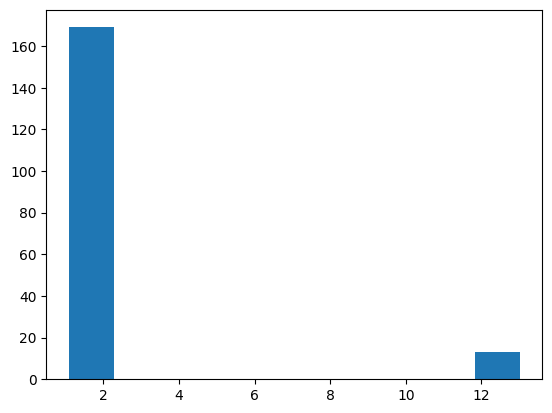

In [7]:
plt.hist(durs)
plt

In [8]:
len(durs[durs[0] > 2])

13

In [9]:
durs[durs[0] > 2].min()

0    13.0
dtype: float64

In [10]:
# Also don't forget to comment your code
# This way it's also easier to spot thought errors along the way
print(meta.columns)
print(meta.head())
meta2 = meta[['id', 'label', 'source']]

Index(['version', 'project', 'dumped', 'id', 'label', 'source', 'task_id',
       'subset', 'box'],
      dtype='object')
   version   project                            dumped   id label  source  \
0      1.1      None                              None  NaN  None    None   
1      NaN  \n        2023-11-11 20:31:16.685846+00:00  NaN  None    None   
2      NaN      None                              None  0.0  fish  manual   
3      NaN      None                              None  1.0  fish  manual   
4      NaN      None                              None  2.0  fish    file   

    task_id   subset     box  
0       NaN     None    None  
1       NaN     None    None  
2  280371.0  default  \n      
3  280371.0  default  \n      
4  280371.0  default  \n      


In [11]:
meta2.dropna()

id label  source
2        0.0  fish  manual
3        1.0  fish  manual
4        2.0  fish    file
5        3.0  fish    file
6        4.0  fish    file
...      ...   ...     ...
3996  3994.0  fish  manual
3997  3995.0  fish  manual
3998  3996.0  fish  manual
3999  3997.0  fish  manual
4000  3998.0  fish  manual

[3999 rows x 3 columns]

In [12]:
column_value_counts = {}

for column in meta.columns:
    column_value_counts[column] = meta[column].value_counts()

for column, value_counts in column_value_counts.items():
    print(value_counts)
    print()

version
1.1    1
Name: count, dtype: int64

project
\n          1
Name: count, dtype: int64

dumped
2023-11-11 20:31:16.685846+00:00    1
Name: count, dtype: int64

id
0.0       1
2671.0    1
2658.0    1
2659.0    1
2660.0    1
         ..
1338.0    1
1339.0    1
1340.0    1
1341.0    1
3998.0    1
Name: count, Length: 3999, dtype: int64

label
fish    3999
Name: count, dtype: int64

source
file      2959
manual    1040
Name: count, dtype: int64

task_id
280427.0    102
280423.0     96
280436.0     92
280418.0     85
280428.0     84
           ... 
280401.0     15
280399.0     15
280396.0     15
280468.0     14
280383.0     13
Name: count, Length: 104, dtype: int64

subset
default    3999
Name: count, dtype: int64

box
\n        3999
Name: count, dtype: int64



### Analysis 2 (preproccessed data): 

In [13]:
def concat_csvs(directory):
    # Initialize an empty list to store all DataFrames
    all_data = []

    # Loop through all files and directories in the given directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".txt"):
                # Construct the full file path
                file_path = os.path.join(root, file)
                
                # Read the CSV file into a DataFrame
                data = pd.read_csv(file_path)

                # Add a column with the filename
                data['Filename'] = file

                # Append the data to the list
                all_data.append(data)

    # Concatenate all DataFrames into a single DataFrame
    combined_data = pd.concat(all_data, ignore_index=True)
    
    return combined_data

In [14]:
combine_csv = concat_csvs('mot_clean')

In [15]:
combine_csv.head()

frame  id        x       y  x_offset  y_offset  Filename
0     49   2  1782.24  425.18     10.04     14.51  10_1.txt
1     50   2  1782.26  425.17     10.13     14.60  10_1.txt
2     51   2  1782.28  425.17     10.21     14.69  10_1.txt
3     52   2  1782.30  425.16     10.29     14.78  10_1.txt
4     53   2  1782.32  425.16     10.37     14.86  10_1.txt

In [16]:
combine_csv.groupby('Filename')['id'].nunique().sum()

3796

In [17]:
series = combine_csv.groupby('Filename')['id'].count()

<Axes: xlabel='Filename'>

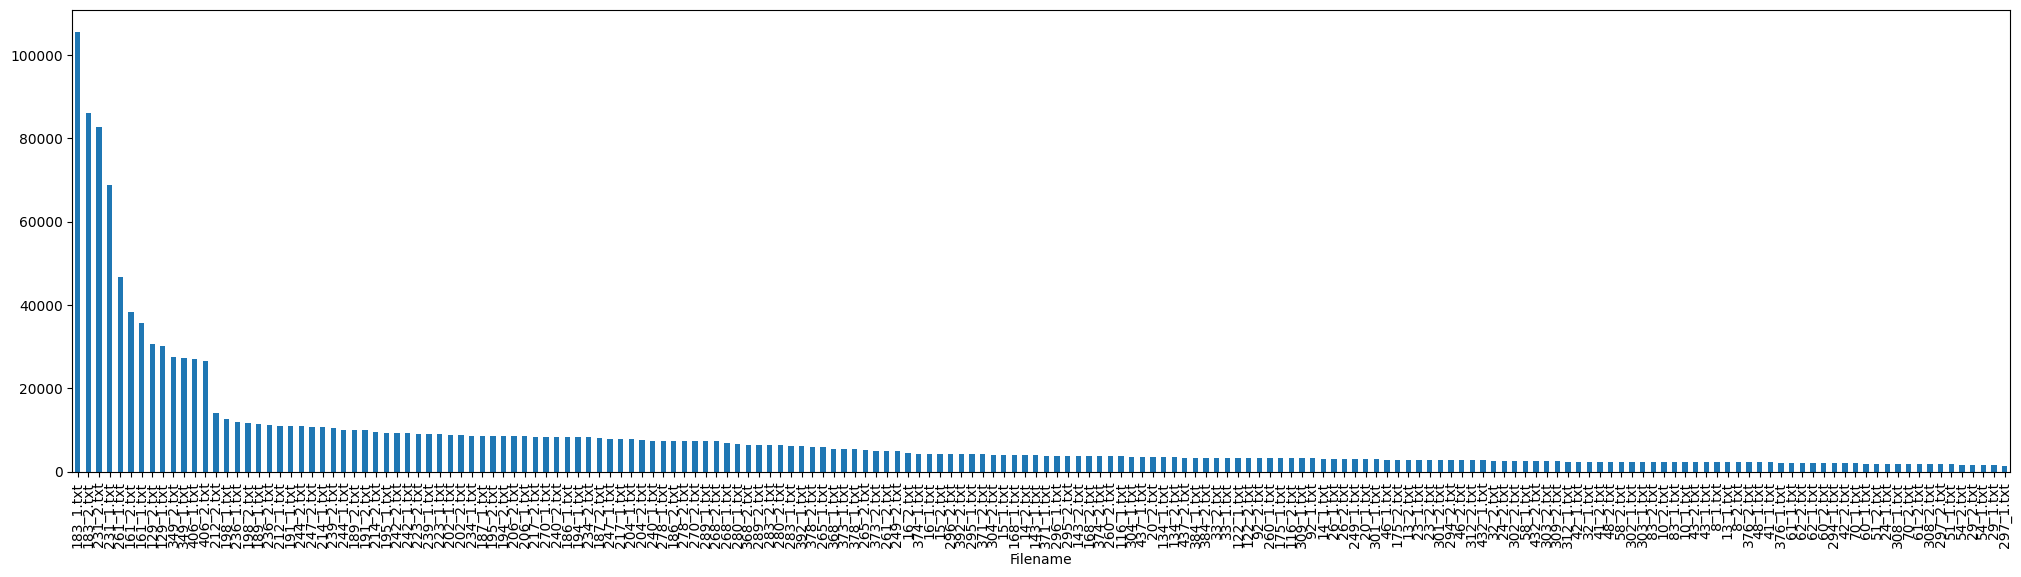

In [18]:
plt.figure(figsize=(25, 6))
series.sort_values(ascending=False).plot(kind='bar')

In [19]:
series.sum()

1469616

In [20]:
series[series > 20000].count()

13

In [21]:
set1 = set(series[series > 20000].keys())

In [22]:
series[series > 20000].agg(['min', 'max'])

min     26554
max    105580
Name: id, dtype: int64

<Axes: xlabel='Filename'>

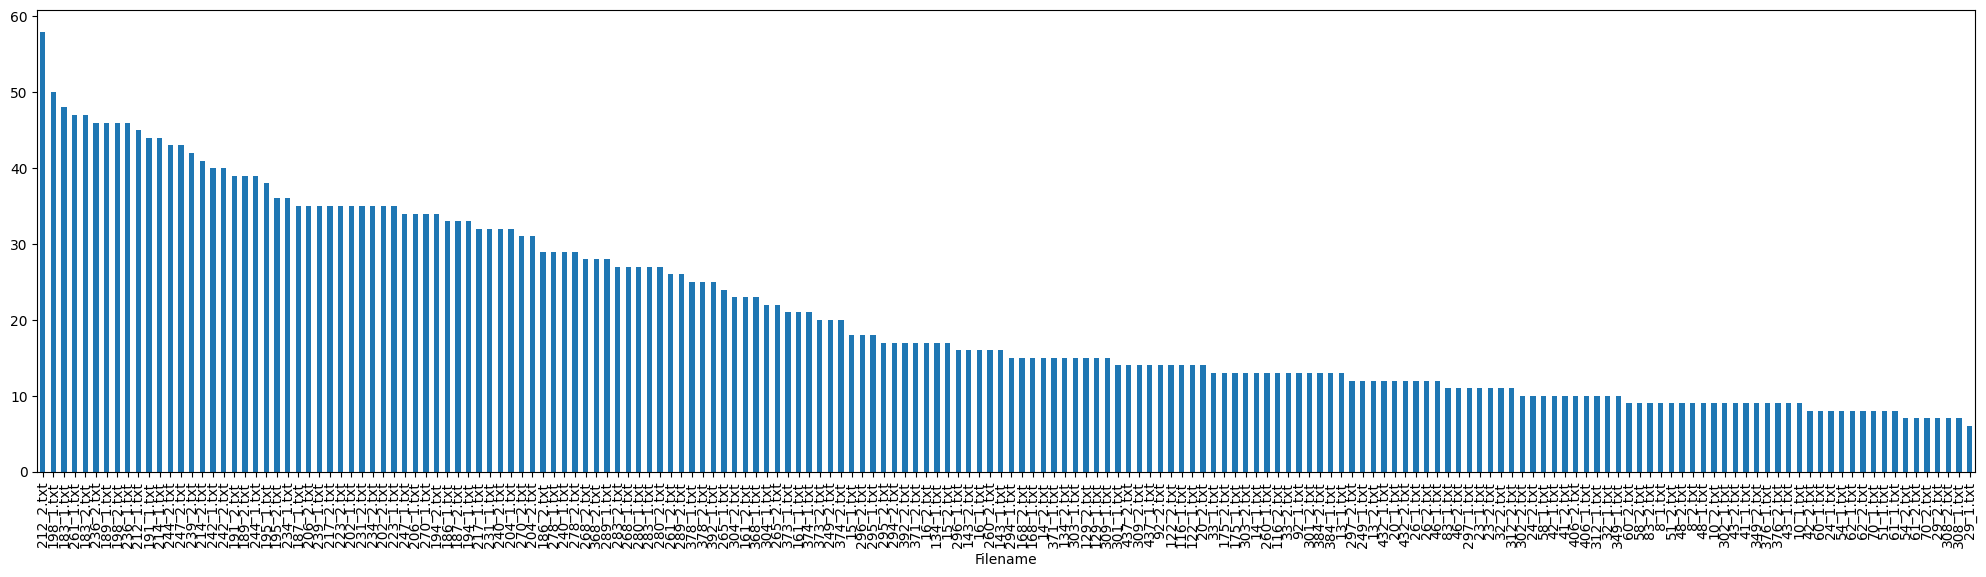

In [23]:
plt.figure(figsize=(25, 6))
combine_csv.groupby('Filename')['id'].nunique().sort_values(ascending=False).plot(kind='bar')

In [24]:
set2 = set(combine_csv.groupby('Filename')['id'].nunique().sort_values(ascending=False)[:13].keys())

In [25]:
set1

{'129_1.txt',
 '129_2.txt',
 '161_1.txt',
 '161_2.txt',
 '183_1.txt',
 '183_2.txt',
 '231_1.txt',
 '231_2.txt',
 '261_1.txt',
 '349_1.txt',
 '349_2.txt',
 '406_1.txt',
 '406_2.txt'}

In [26]:
set2

{'183_1.txt',
 '183_2.txt',
 '189_1.txt',
 '191_1.txt',
 '198_1.txt',
 '198_2.txt',
 '212_1.txt',
 '212_2.txt',
 '214_1.txt',
 '236_1.txt',
 '236_2.txt',
 '244_2.txt',
 '261_1.txt'}

We observe two things from the cleaned annotation files, that first for all videos, considering each frame, there is a total of 3796 entites of observed, observed in total 1469616 times. All these entities are classified as fish so there are no distincition between them other than there repective IDs.<br> For the longer videos (13), there are at least 20000 observations of fish for each which the maximum being 105580 obeservations and minimum 26554 for each a respective video.
We observe as well that the longer the video does not mean that it has the most entities in them.

### Analysis 3 (visualizing bounding boxes):

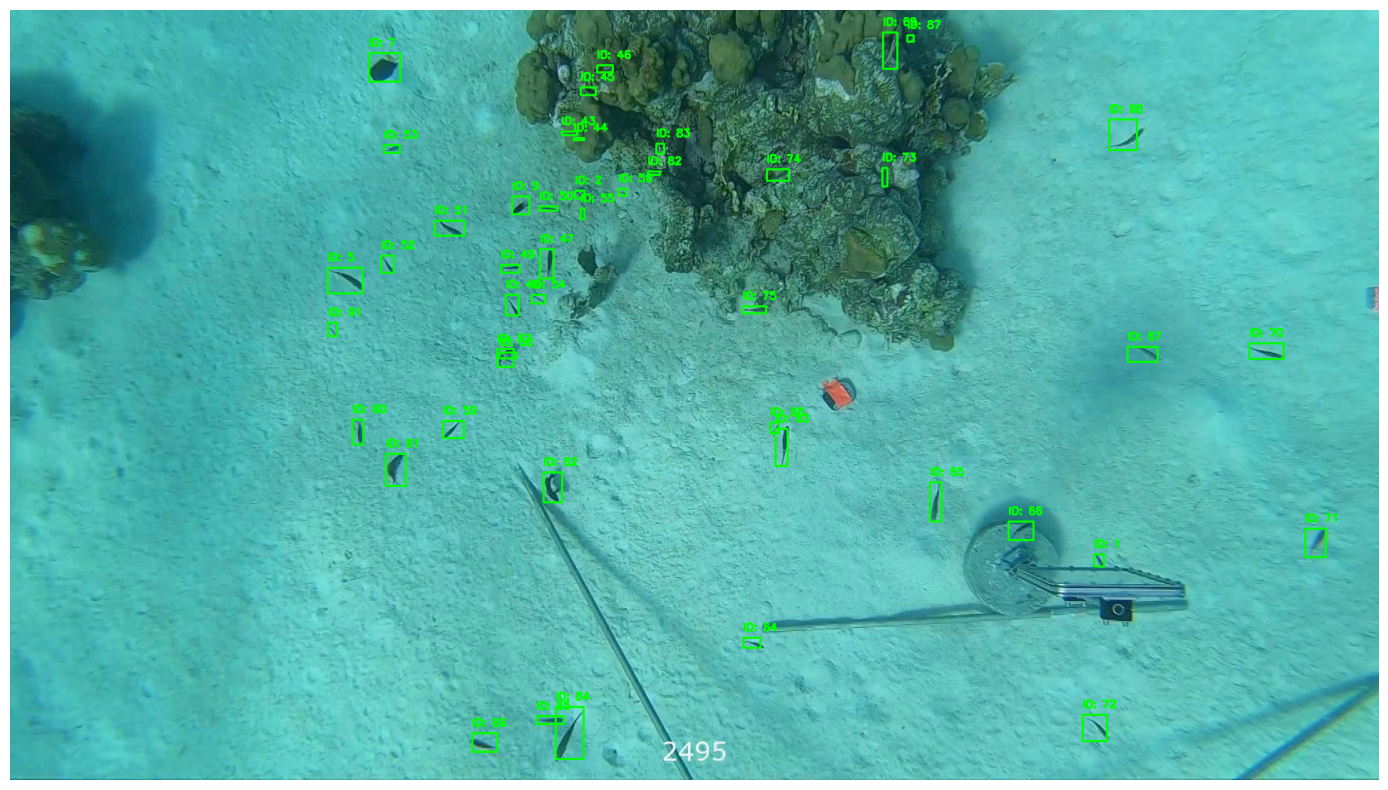

In [32]:
# Read the image file
image_path = r'vif_frames\236_1\frame_0131.jpeg'
frame_number_to_display = 131  # Specify the frame number you want to display
frame = cv2.imread(image_path)

# Read the bounding box coordinates from the CSV file
csv_path = r'mot_clean\val\236_1\236_1.txt'
df = pd.read_csv(csv_path)

# Get the bounding box coordinates for the specified frame
frame_boxes = df[df['frame'] == frame_number_to_display]

# Draw bounding boxes on the frame
for _, row in frame_boxes.iterrows():
    x, y, x_offset, y_offset, obj_id = int(row['x']), int(row['y']), int(row['x_offset']), int(row['y_offset']), int(row['id'])
    xmin, ymin, xmax, ymax = x, y, x + x_offset, y + y_offset

    # Draw bounding box
    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Display object id
    cv2.putText(frame, f"ID: {obj_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the frame with bounding boxes
plt.figure(figsize=(25,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


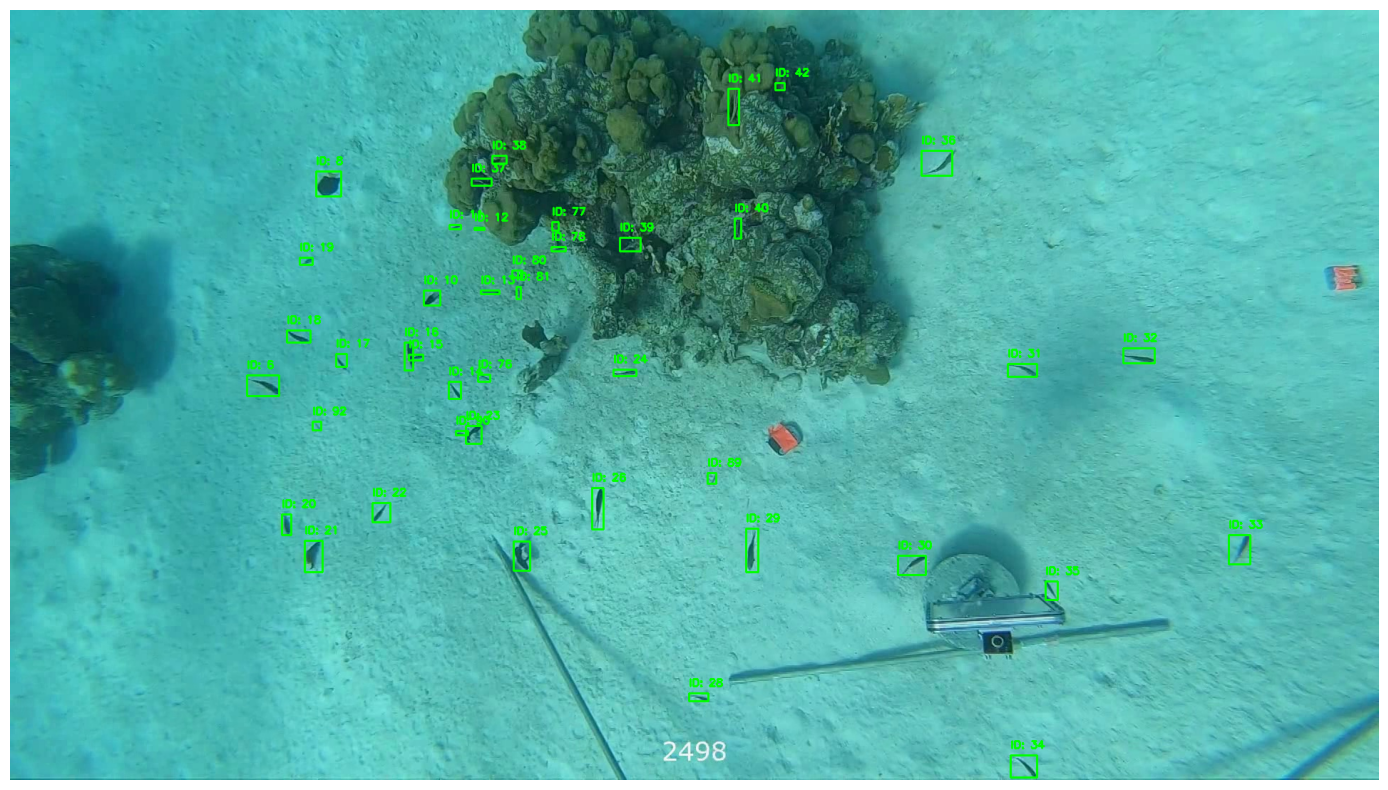

In [34]:
# Read the image file
image_path = r'vif_frames\236_2\frame_0131.jpeg'
frame_number_to_display = 131  # Specify the frame number you want to display
frame = cv2.imread(image_path)

# Read the bounding box coordinates from the CSV file
csv_path = r'mot_clean\train\236_2\236_2.txt'
df = pd.read_csv(csv_path)

# Get the bounding box coordinates for the specified frame
frame_boxes = df[df['frame'] == frame_number_to_display]

# Draw bounding boxes on the frame
for _, row in frame_boxes.iterrows():
    x, y, x_offset, y_offset, obj_id = int(row['x']), int(row['y']), int(row['x_offset']), int(row['y_offset']), int(row['id'])
    xmin, ymin, xmax, ymax = x, y, x + x_offset, y + y_offset

    # Draw bounding box
    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Display object id
    cv2.putText(frame, f"ID: {obj_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the frame with bounding boxes
plt.figure(figsize=(25,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


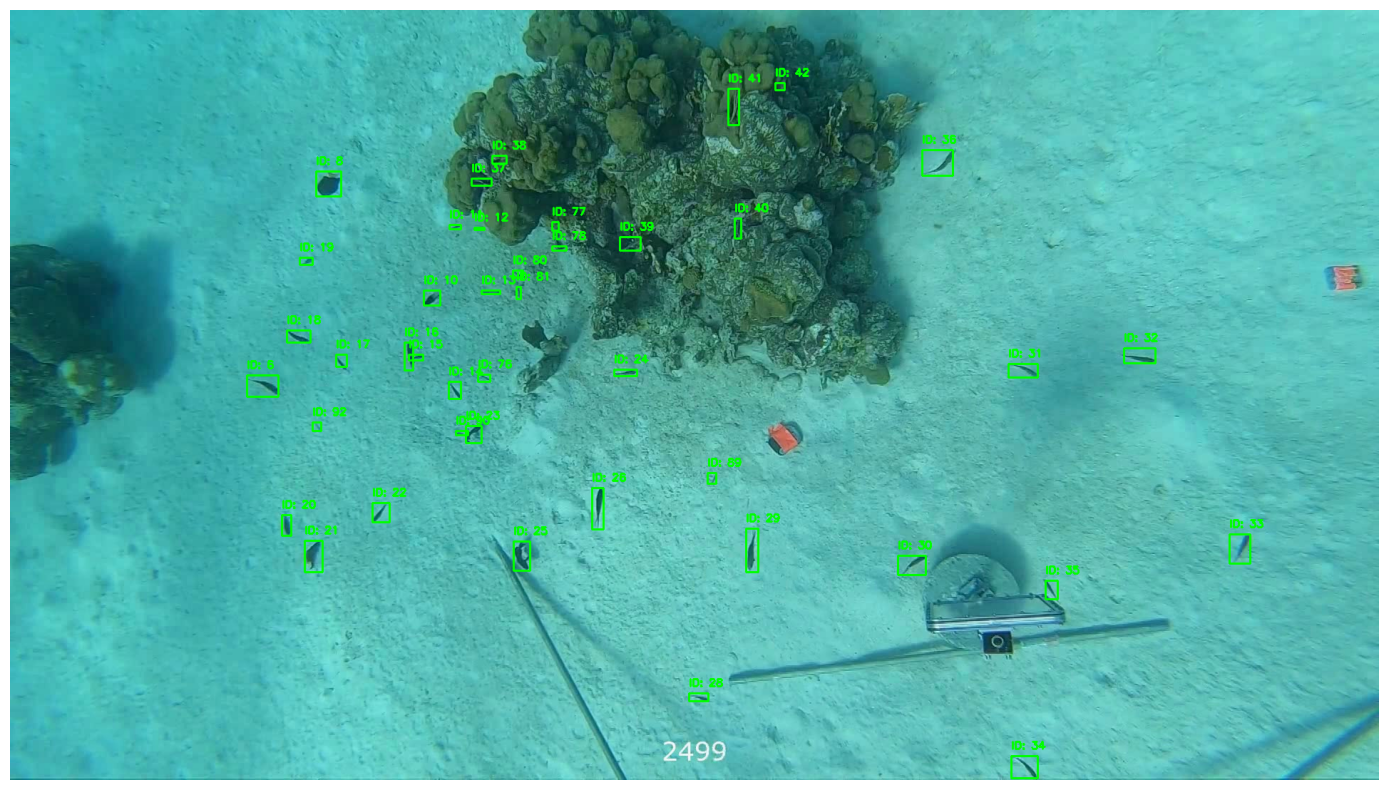

In [39]:
# Read the image file
image_path = r'vif_frames\236_2\frame_0132.jpeg'
frame_number_to_display = 132  # Specify the frame number you want to display
frame = cv2.imread(image_path)

# Read the bounding box coordinates from the CSV file
csv_path = r'mot_clean\train\236_2\236_2.txt'
df = pd.read_csv(csv_path)

# Get the bounding box coordinates for the specified frame
frame_boxes = df[df['frame'] == frame_number_to_display]

# Draw bounding boxes on the frame
for _, row in frame_boxes.iterrows():
    x, y, x_offset, y_offset, obj_id = int(row['x']), int(row['y']), int(row['x_offset']), int(row['y_offset']), int(row['id'])
    xmin, ymin, xmax, ymax = x, y, x + x_offset, y + y_offset

    # Draw bounding box
    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Display object id
    cv2.putText(frame, f"ID: {obj_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the frame with bounding boxes
plt.figure(figsize=(25,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


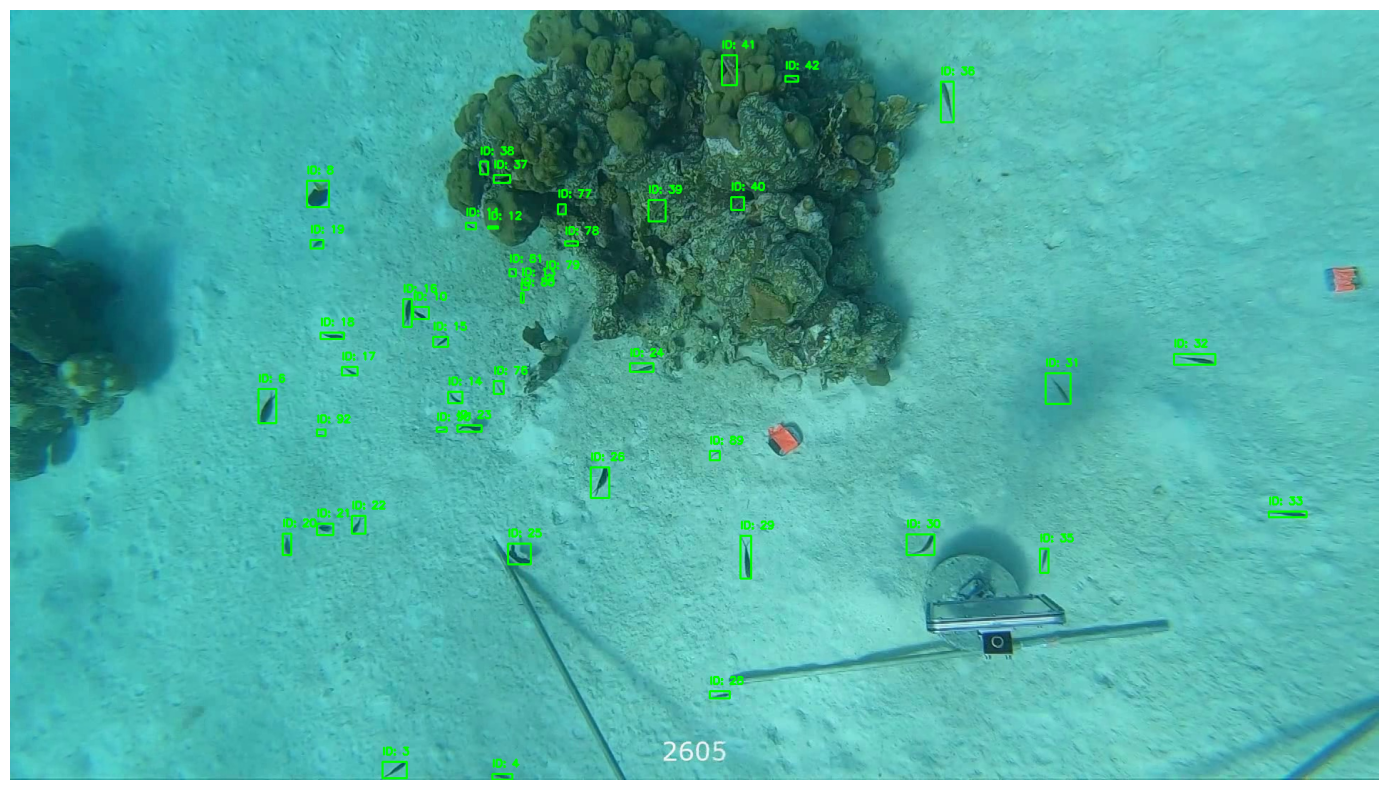

In [44]:
# Read the image file
image_path = r'vif_frames\236_2\frame_0238.jpeg'
frame_number_to_display = 238 # Specify the frame number you want to display
frame = cv2.imread(image_path)

# Read the bounding box coordinates from the CSV file
csv_path = r'mot_clean\train\236_2\236_2.txt'
df = pd.read_csv(csv_path)

# Get the bounding box coordinates for the specified frame
frame_boxes = df[df['frame'] == frame_number_to_display]

# Draw bounding boxes on the frame
for _, row in frame_boxes.iterrows():
    x, y, x_offset, y_offset, obj_id = int(row['x']), int(row['y']), int(row['x_offset']), int(row['y_offset']), int(row['id'])
    xmin, ymin, xmax, ymax = x, y, x + x_offset, y + y_offset

    # Draw bounding box
    cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Display object id
    cv2.putText(frame, f"ID: {obj_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the frame with bounding boxes
plt.figure(figsize=(25,10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


We vizualised the one of the frames of video 236_1 (left view) and the same one for video 236_2 (right view)

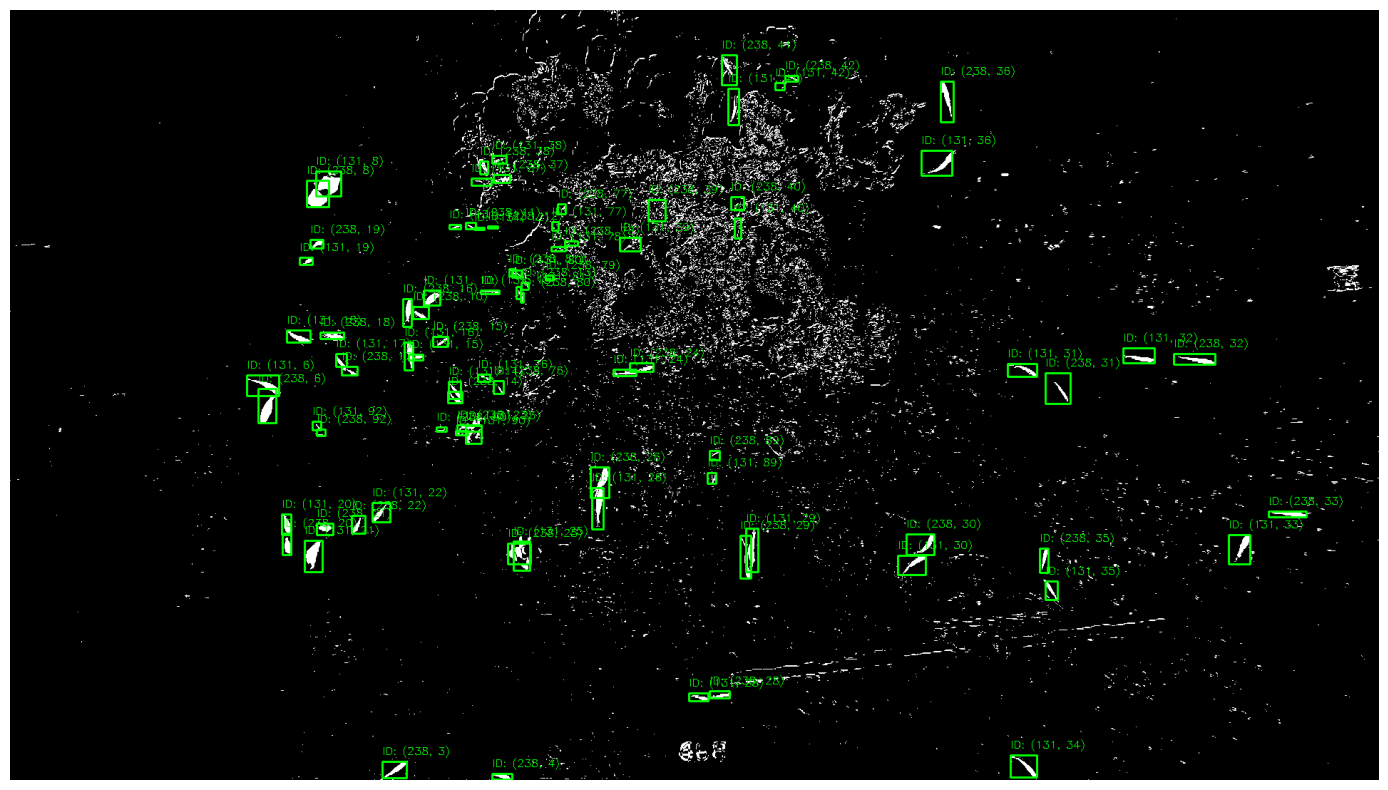

In [60]:
# Read two consecutive frames
frame1 = cv2.imread(r'vif_frames\236_2\frame_0131.jpeg')
frame2 = cv2.imread(r'vif_frames\236_2\frame_0238.jpeg')

# Convert frames to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Compute absolute difference between frames
diff = cv2.absdiff(gray1, gray2)

# Apply a threshold to get binary image
_, threshold = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Read bounding box coordinates from dataframe
csv_path = r'mot_clean\train\236_2\236_2.txt'
df = pd.read_csv(csv_path)

# Convert grayscale image back to BGR for visualization
threshold_bgr = cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR)

# Draw bounding boxes on the thresholded frame
for frame_number in [131, 238]:
    frame_boxes = df[df['frame'] == frame_number]
    for _, row in frame_boxes.iterrows():
        x, y, x_offset, y_offset, obj_id = int(row['x']), int(row['y']), int(row['x_offset']), int(row['y_offset']), int(row['id'])
        xmin, ymin, xmax, ymax = x, y, x + x_offset, y + y_offset

        # Draw bounding box
        cv2.rectangle(threshold_bgr, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

        # Display object id
        cv2.putText(threshold_bgr, f"ID: {frame_number, obj_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display thresholded image with bounding boxes
plt.figure(figsize=(25, 10))
plt.imshow(cv2.cvtColor(threshold_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

With immage diffrencing we can observe the motion of the objectect using two frames, to better udnerstand their behaviour.